<a href="https://colab.research.google.com/github/ritikadas18/ML_LAB/blob/main/DecisonTreePrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ritikadas18/ML_LAB.git

Cloning into 'ML_LAB'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 44 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
pima = pd.read_csv("/content/ML_LAB/salaries.csv")

In [4]:
pima.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [9]:
feature_cols = ['company', 'job','degree']
X = pima[feature_cols]
y = pima.salary_more_then_100k
print(X)
print(y)


       company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters
0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [12]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_company.fit_transform(X['job'])
X['degree_n'] = le_company.fit_transform(X['degree'])
X.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [13]:
X_n = X.drop(['company','job','degree'],axis='columns')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size = 0.30,random_state=1 )

In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


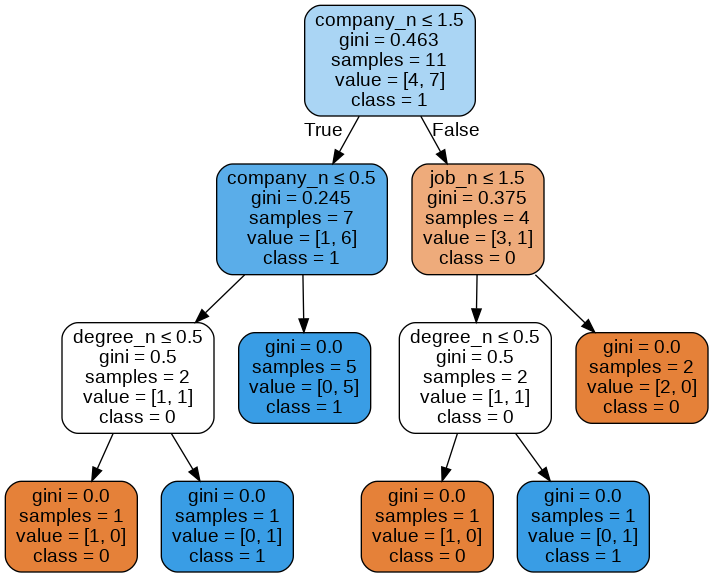

In [16]:
feature_n = ['company_n','job_n','degree_n']
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_n,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('salaries.png')
Image(graph.create_png())